# Analisi dati esperimento di Millikan

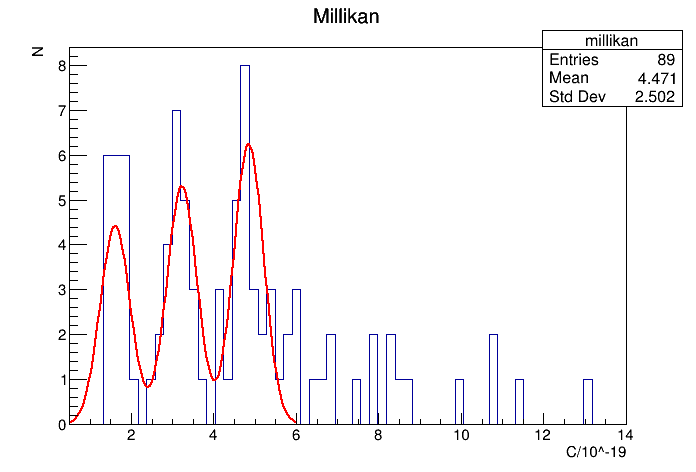

 FCN=15.4386 FROM MIGRAD    STATUS=CONVERGED     369 CALLS         370 TOTAL
                     EDM=6.50232e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.61798e+00   2.22854e-02   6.08034e-05   2.63341e-04
   2  p1           3.63974e-01   3.37074e-02   7.34269e-05   8.03609e-04
   3  p2           4.41771e+00   1.08425e+00   2.78943e-03   1.40125e-05
   4  p3           5.29979e+00   1.21755e+00   3.08846e-03   1.27992e-05
   5  p4           6.23300e+00   1.34989e+00   3.32234e-03   5.56527e-06
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: millikan (Potential memory leak).


In [11]:
#include <iostream>
using namespace std;

h=TH1D("millikan","Millikan",65,0.,0.);
ifstream ifile("millikan.dat");
double val;

TCanvas c;

while(ifile >> val){
    
    h.Fill(val);
    
}
c.Draw();
h.GetXaxis()->SetTitle("C/10^-19");
h.GetYaxis()->SetTitle("N");

h.Draw("COLZ");

TF1 fun("f","[2]*TMath::Gaus(x,[0],[1])+[3]*TMath::Gaus(x,2*[0],[1])+[4]*TMath::Gaus(x,3*[0],[1])",0,6);
fun.SetParameter(1,0.3);
fun.SetParameter(0,1.602);
fun.SetParameter(2,0.4);
fun.SetParameter(3,0.4);
fun.SetParameter(4,0.4);
h.Fit("f","RL");




In [ ]:
val=fun.